In [1]:
using Plots, DataFrames, CSV, DelimitedFiles, Statistics

In [2]:
noesr_df = DataFrame(CSV.File("prices_noesr.csv", header=false));

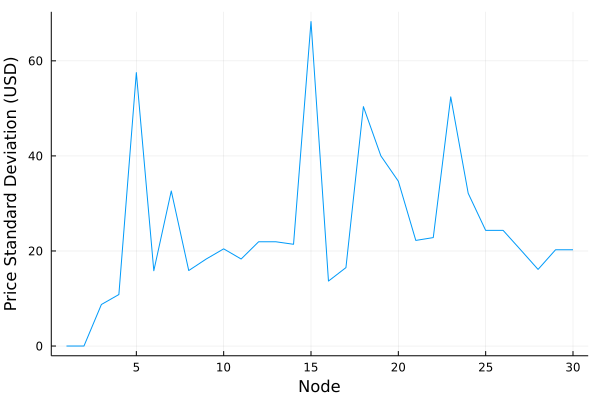

In [8]:
plot(std(Matrix(noesr_df), dims=2), xlabel = "Node", ylabel = "Price Standard Deviation (USD)", legend=false)
# savefig("k0_std.pdf")

In [4]:
df = DataFrame(CSV.File("prices_20.csv", header=false));
df1 = DataFrame(CSV.File("prices_20_single1.csv", header=false));
df2 = DataFrame(CSV.File("prices_20_single2.csv", header=false));
df3 = DataFrame(CSV.File("prices_20_single3.csv", header=false));

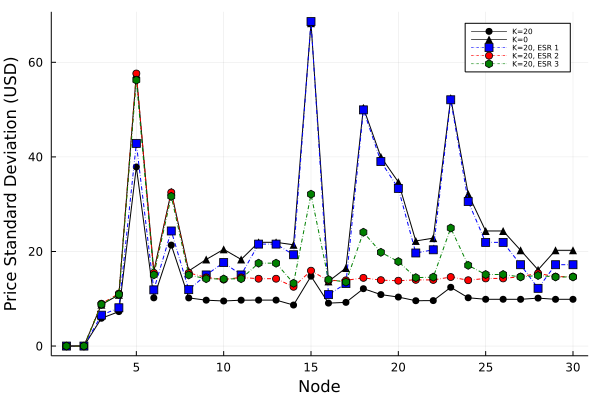

In [10]:
plot(std(Matrix(df), dims=2), xlabel = "Node", ylabel = "Price Standard Deviation (USD)", label="K=20", linecolor = :black, markercolor = :black, markershape = :circle, legendfontsize = 5)
plot!(std(Matrix(noesr_df), dims=2), linecolor = :black, markercolor = :black, markershape = :utriangle, label = "K=0")
plot!(std(Matrix(df1), dims=2), linestyle = :dashdot, linecolor = :blue, markercolor = :blue, markershape = :square, label = "K=20, ESR 1")
plot!(std(Matrix(df2), dims=2), linestyle = :dashdot, linecolor = :red, markercolor = :red, markershape = :circle, label = "K=20, ESR 2")
plot!(std(Matrix(df3), dims=2), linestyle = :dashdot, linecolor = :green, markercolor = :green, markershape = :hexagon, label = "K=20, ESR 3")
# savefig("k20_std.pdf")

In [6]:
voldfs = [DataFrame(CSV.File("prices_noesr.csv", header=false)),
          DataFrame(CSV.File("prices_1.csv", header=false)),
          DataFrame(CSV.File("prices_5.csv", header=false)),
          DataFrame(CSV.File("prices_10.csv", header=false)),
          DataFrame(CSV.File("prices_15.csv", header=false)),
          DataFrame(CSV.File("prices_20.csv", header=false)),
          DataFrame(CSV.File("prices_25.csv", header=false)),
          DataFrame(CSV.File("prices_50.csv", header=false))];
bus5std, bus15std, bus24std = Float64[], Float64[], Float64[];
for i in voldfs
    stds = std(Matrix(i), dims=2)
    push!(bus5std, stds[5])
    push!(bus15std, stds[15])
    push!(bus24std, stds[24])
end

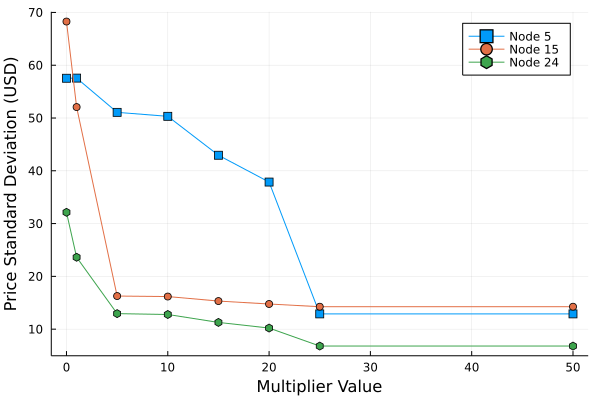

In [9]:
x = [0,1,5,10,15,20,25,50]
plot(x, bus5std, xlabel = "Multiplier Value", ylabel = "Price Standard Deviation (USD)", label = "Node 5", markershape = :square)
plot!(x, bus15std, label = "Node 15", markershape = :circle)
plot!(x, bus24std, label = "Node 24", markershape = :hexagon)
# savefig("std_over_K.pdf")